In [1]:
# Load and activate the SQL extension to allow us to execute SQL in a Jupyter notebook.
%load_ext sql

#### AIMS:
1:To explore the database and perform simple SQL operations and

2:Report few findings from the database and make simple recommendation(s)

# 1.0: printing the whole tables in the database

In [24]:
#KNOWING THE TABLES IN THE DATABASE 
query = "SELECT name FROM sqlite_master WHERE type='table';"  # Defines a SQL query to retrieve the names of all tables in the database.
tables = pd.read_sql_query(query, conn)  # Executes the SQL query and loads the result (table names) into a pandas DataFrame.
tables    # Displays the DataFrame containing the table names.


,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


### 13 tables is in the database as listed above from 0 to 12

# 1.1: UNDERSTANDING THE DATABASE

In [25]:
# Import necessary libraries
import sqlite3
import pandas as pd

# Define a SQL query to retrieve all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)  # Execute the query and load the table names into a pandas DataFrame

# Iterate through each table and print the first five rows
for table_name in tables['name']:  # Loop through each table name in the DataFrame
    print(f"First 5 rows of table: {table_name}")  # Print the current table name
    query = f"SELECT * FROM {table_name} LIMIT 5;"  # Define a query to fetch the first 5 rows of the table
    df = pd.read_sql_query(query, conn)  # Execute the query and load the result into a pandas DataFrame
    print(df)  # Print the DataFrame containing the first 5 rows
    print("\n")  # Add a newline for better readability


First 5 rows of table: albums
   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


First 5 rows of table: sqlite_sequence
          name   seq
0       genres    25
1  media_types     5
2      artists   275
3       albums   347
4       tracks  3503


First 5 rows of table: artists
   ArtistId               Name
0         1              AC/DC
1         2             Accept
2         3          Aerosmith
3         4  Alanis Morissette
4         5    Alice In Chains


First 5 rows of table: customers
   CustomerId  FirstName     LastName  \
0           1       Luís    Gonçalves   
1           2     Leonie       Köhler   
2           3   François     Tremblay   
3           4      Bjørn 

1.2: PRINTING THE TABLES ONE AFTER ANOTHER, FILLING NULL VALUES, TELLING A STORY WITH VISUALIZATION, MAKING NECESSARY RECOMMENDATION AND PERFORMING OTHER COMMON SQL OPERATIONS ON THE DATABASE.  

# 1.2.1:   IN albums;

In [4]:
# printing the entire tables
import pandas as pd
import sqlite3 as sql
conn = sql.connect("chinook.db") 

df = pd.read_sql_query("SELECT * FROM albums", conn) 
df

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


#### the album table contains 3 columns(album i.d, title and artist i.d) and 347 rows.

In [6]:
# checking for null values in the table 
# Query the 'albums' table
query = "SELECT * FROM albums;"  # Retrieves all rows and columns from the 'albums' table.
albums = pd.read_sql_query(query, conn)  # Loads the data into a pandas DataFrame.

# Find rows with missing values
rows_with_missing_values = albums[albums.isnull().any(axis=1)]  # Filters rows where any column has a NaN value.

# Display the rows with missing values
print(rows_with_missing_values)


Empty DataFrame
Columns: [AlbumId, Title, ArtistId]
Index: []


#### Athere are no rows with missing values in the 'albums'

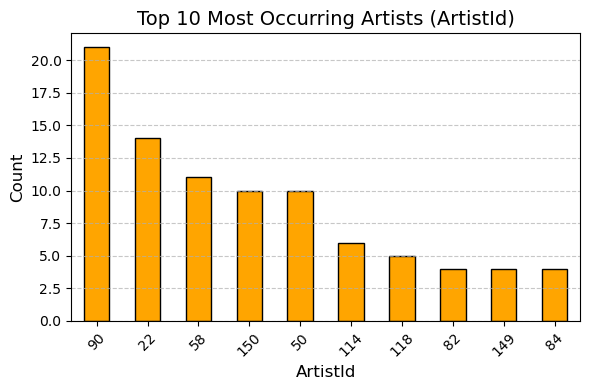

In [14]:
# Plot a bar chart for the top artists with a reduced chart size
plt.figure(figsize=(6, 4))  # Adjusts the size of the figure (width=6, height=4)
top_artists.plot(kind='bar', color='orange', edgecolor='black')  # Creates the bar chart

# Customize the chart
plt.title('Top 10 Most Occurring Artists (ArtistId)', fontsize=14)  # Sets the title
plt.xlabel('ArtistId', fontsize=12)  # Labels the x-axis
plt.ylabel('Count', fontsize=12)  # Labels the y-axis
plt.xticks(rotation=45)  # Rotates the x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds grid lines for better clarity

# Show the chart
plt.tight_layout()  # Ensures no overlap of labels
plt.show()


#### the barchart above shows the the top 10 artists with the highest numbers of albums in decending order. artist i.d 90 has the highest count of albums followed by 22, 58, 150, 114, 118, 82, 149, and 84.

In [26]:
# Step 1: Define the SQL query for finding the top 10 most occurring ArtistId values
query_top_artists = """
WITH TopArtists AS (
    SELECT ArtistId
    FROM albums
    GROUP BY ArtistId
    ORDER BY COUNT(ArtistId) DESC
    LIMIT 10
)
SELECT *
FROM albums
WHERE ArtistId IN (SELECT ArtistId FROM TopArtists);
"""

# Step 2: Execute the query and load the result into a pandas DataFrame
top_artists_rows = pd.read_sql_query(query_top_artists, conn)

# Step 3: Display the filtered rows
print(top_artists_rows)


    AlbumId                                              Title  ArtistId
0        29                                     Axé Bahia 2001        21
1        32                                      Carnaval 2001        21
2        45                              Sambas De Enredo 2001        21
3        53                                       Vozes do MPB        21
4        30                       BBC Sessions [Disc 1] [Live]        22
..      ...                                                ...       ...
84      237                                     Rattle And Hum       150
85      238                              The Best Of 1980-1990       150
86      239                                                War       150
87      240                                            Zooropa       150
88      255  Instant Karma: The Amnesty International Campa...       150

[89 rows x 3 columns]


In [29]:
# Check for Duplicate Album Titles
query_duplicate_titles = """
SELECT Title, COUNT(*) AS Occurrences
FROM albums
GROUP BY Title
HAVING COUNT(*) > 1;
"""
duplicate_titles = pd.read_sql_query(query_duplicate_titles, conn)
print("\nDuplicate Album Titles:")
print(duplicate_titles)


Duplicate Album Titles:
Empty DataFrame
Columns: [Title, Occurrences]
Index: []


#### there are no duplicate album name in the album table 

In [31]:
#Retrieve Albums with Specific Names (e.g., containing 'love')
query_specific_titles = """
SELECT *
FROM albums
WHERE Title LIKE '%love%';
"""
specific_titles = pd.read_sql_query(query_specific_titles, conn)
print("\nAlbums with Titles Containing 'love':")
print(specific_titles)


Albums with Titles Containing 'love':
   AlbumId                                              Title  ArtistId
0      213  Pure Cult: The Best Of The Cult (For Rockers, ...       139


# 1.2.2: in the table sqlite_sequence

In [59]:
# printing the entire table sqlite_sequence
df = pd.read_sql_query("SELECT * FROM sqlite_sequence", conn)
df

,name,seq
0,genres,25
1,media_types,5
2,artists,275
3,albums,347
4,tracks,3503
5,employees,8
6,customers,59
7,invoices,412
8,invoice_items,2240
9,playlists,18


#### the table sqlite_sequence has 10 rows by 2 columns

# 1.2.3: in the artists

In [61]:
# printing the entire table artists
df = pd.read_sql_query("SELECT * FROM artists", conn)
df

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


#### there are 275 artists in the table 'artists'

# 1.2.4: in the table 'customers'

In [63]:
# PRINTING THE ENTIRE TABLE 'customers' from the database
df = pd.read_sql_query("SELECT * FROM customers", conn) 
df

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


#### the table; customers has 9 columns by 58 rows containing customers details such as address, city, customer id, company,country, postal code, phone, emails of customers, lastname and firstname of the customers etc.

In [65]:
# tabulating the numbers of occurance of each country in the coutry colum of customers
query_distinct_country_count = """
SELECT Country, COUNT(*) AS Occurrence
FROM customers
GROUP BY Country
ORDER BY Occurrence DESC;
"""
# Execute the query and load the result into a pandas DataFrame
distinct_country_count = pd.read_sql_query(query_distinct_country_count, conn)

# Display the distinct counts of each country
print(distinct_country_count)

           Country  Occurrence
0              USA          13
1           Canada           8
2           France           5
3           Brazil           5
4          Germany           4
5   United Kingdom           3
6         Portugal           2
7            India           2
8   Czech Republic           2
9           Sweden           1
10           Spain           1
11          Poland           1
12          Norway           1
13     Netherlands           1
14           Italy           1
15         Ireland           1
16         Hungary           1
17         Finland           1
18         Denmark           1
19           Chile           1
20         Belgium           1
21         Austria           1
22       Australia           1
23       Argentina           1


#### the entire customer are under 24 countries and USA has the highest numbers of customers followed by Canada, France, Germany, United Kingdom, Portugal, India, Czech Republic and other countries in European countries with only 1 customers each.

# 1.2.5: the table 'Employees'

In [72]:
# printing the entire table employees
df = pd.read_sql_query("SELECT * FROM employees", conn)
df

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


#### Chinook has only 8 employees

# 1.2.6: the table 'genres'

In [75]:
# printing the entire table genres
df = pd.read_sql_query("SELECT * FROM genres", conn)
df

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


#### the genres's table contains 2 columns (genre id and name) and 25 rows

# 1.2.7: table 'invoices'

In [77]:
# printing the entire table invoices
df = pd.read_sql_query("SELECT * FROM invoices", conn)
df

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


#### the table contains 412 by 9 columms

In [83]:
#counting the occurrences of each BillingCountry
query_tabulate_billing_country = """
SELECT BillingCountry, COUNT(*) AS Occurrence
FROM invoices
GROUP BY BillingCountry
ORDER BY Occurrence DESC;
"""

# Execute the query and load the result into a pandas DataFrame
billing_country_tabulation = pd.read_sql_query(query_tabulate_billing_country, conn)

# Display the tabulated occurrences of BillingCountry
print(billing_country_tabulation)

    BillingCountry  Occurrence
0              USA          91
1           Canada          56
2           France          35
3           Brazil          35
4          Germany          28
5   United Kingdom          21
6         Portugal          14
7   Czech Republic          14
8            India          13
9           Sweden           7
10           Spain           7
11          Poland           7
12          Norway           7
13     Netherlands           7
14           Italy           7
15         Ireland           7
16         Hungary           7
17         Finland           7
18         Denmark           7
19           Chile           7
20         Belgium           7
21         Austria           7
22       Australia           7
23       Argentina           7


#### the occurences of the 24 Billing_Country from the table are as follows; 91 USA,56 Canada, 35 France, 35 Brazil,  down to 7 Sweden and other europeans countries counting 7 per country.

# 1.2.8: the table 'invoice_items'

In [85]:
# printing the entire table invoice_items
df = pd.read_sql_query("SELECT * FROM invoice_items", conn)
df

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
...,...,...,...,...,...
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1


In [ ]:
the table contais 2249 rows by 5 columns

# 1.2.9: from the table 'media_types'

In [87]:
# printing the entire table media_types
df = pd.read_sql_query("SELECT * FROM media_types", conn)
df

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


#### the table media_types contains 5 rows by 2 columns(mediatype i.d and name)

# 1.3.0: the table ' playlists'

In [89]:
# printing the entire table playlists
df = pd.read_sql_query("SELECT * FROM playlists", conn)
df

,PlaylistId,Name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music
5,6,Audiobooks
6,7,Movies
7,8,Music
8,9,Music Videos
9,10,TV Shows


#### the table playlists contains 18 rows by 2 columns (playlist i.d and name)

# 1.3.1: the table'playlist_track'

In [91]:
# printing the entire table playlist_track 
df = pd.read_sql_query("SELECT * FROM playlist_track", conn)
df

,PlaylistId,TrackId
0,1,3402
1,1,3389
2,1,3390
3,1,3391
4,1,3392
...,...,...
8710,17,2094
8711,17,2095
8712,17,2096
8713,17,3290


#### the table is made up of8715 rows by 2 columns(playlist i.d and track i.d)

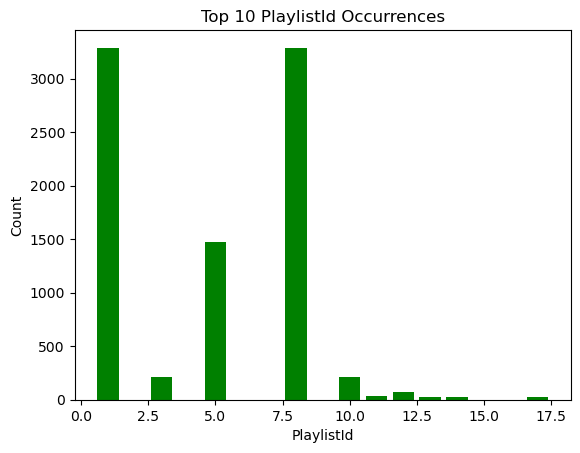

In [93]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt  # For creating visualizations

# SQL query to count occurrences of PlaylistId and get the top 10
query = """
SELECT PlaylistId, COUNT(*) AS Occurrence
FROM playlist_track
GROUP BY PlaylistId
ORDER BY Occurrence DESC
LIMIT 10;
"""

# Execute the query and save the result as a DataFrame
top_playlist_ids = pd.read_sql_query(query, conn)  # Query the database

# Create a bar chart for the top 10 PlaylistIds
plt.bar(top_playlist_ids['PlaylistId'], top_playlist_ids['Occurrence'], color='green')  # Draw the bars

# Add labels and title to the chart
plt.title('Top 10 PlaylistId Occurrences')  # Chart title
plt.xlabel('PlaylistId')  # X-axis label
plt.ylabel('Count')  # Y-axis label

# Show the chart
plt.show()  # Display the bar chart


#### the barchart above showcases the top 10 most occuring playlist id numbers randomly. however,it is tabulated below.

In [101]:
# Define the SQL query to get the most occurring PlaylistIds, tabulated in ascending order
query_top_10_playlist_ids_ascending = """
SELECT PlaylistId, COUNT(*) AS Occurrence
FROM playlist_track
GROUP BY PlaylistId
ORDER BY Occurrence DESC
LIMIT 10;
"""

# Execute the query and save the result into a pandas DataFrame
top_10_playlist_ids = pd.read_sql_query(query_top_10_playlist_ids_ascending, conn)

# Display the result
print(top_10_playlist_ids)


   PlaylistId  Occurrence
0           1        3290
1           8        3290
2           5        1477
3           3         213
4          10         213
5          12          75
6          11          39
7          17          26
8          13          25
9          14          25


#### the table below shows the top ten playlist i.d with their numbers of occurences with i.d numbers of 1 and 8 having the highest and the second highest occurrence

# 1.3.2: table 'tracks'

In [105]:
# printing the entire table tracks
df = pd.read_sql_query("SELECT * FROM tracks", conn)
df

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


#### the table cotains 3503 rows by 9 columns

In [107]:
# PRINTING 10 COMPOSERS
query_top_composers = """
SELECT Composer, COUNT(*) AS Occurrence
FROM tracks
GROUP BY Composer
ORDER BY Occurrence DESC
LIMIT 10;
"""

# Execute the query and load the result into a pandas DataFrame
top_composers = pd.read_sql_query(query_top_composers, conn)

# Display the top 10 most occurring composers
print(top_composers)

                                         Composer  Occurrence
0                                            None         978
1                                    Steve Harris          80
2                                              U2          44
3                                 Jagger/Richards          35
4                                    Billy Corgan          31
5                                     Kurt Cobain          26
6  Bill Berry-Peter Buck-Mike Mills-Michael Stipe          25
7                                   The Tea Party          24
8                                     Miles Davis          23
9                                    Gilberto Gil          23


#### the table above displays the top 10 composers from tracks table. however, unknown composers are having the highest count followed by Steve Harris and U2 etc.

# 1.3.3: sqlite_stat1

In [109]:
# printing the entire table sqlite_stat1
df = pd.read_sql_query("SELECT * FROM sqlite_stat1", conn)
df

,tbl,idx,stat
0,tracks,IFK_TrackMediaTypeId,3503 701
1,tracks,IFK_TrackGenreId,3503 141
2,tracks,IFK_TrackAlbumId,3503 11
3,playlist_track,IFK_PlaylistTrackTrackId,8715 3
4,playlist_track,sqlite_autoindex_playlist_track_1,8715 623 1
5,albums,IFK_AlbumArtistId,347 2
6,artists,None,275
7,customers,IFK_CustomerSupportRepId,59 20
8,playlists,None,18
9,employees,IFK_EmployeeReportsTo,8 2


# FEW NECCESARY RECOMMENDATIONS


1: the organization should device effective promotion strategies to market their services in EU countries and also Australia as they have low customers and invoice turn up from those regions.


2: provide promotion loans if possible to upcoming composers for their promotion and marketing of their musics to the audience.


3: playlists with less listeners should mostly be recommended to free streamers.


4: tracks that are played more should be mixed with least played ones in suggested playlist creation and also in free selections.